## HW4_jz3309_Assignment2

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
from IPython.display import Image

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# IDEA

### People aged under 30 are more likely than people over 30  to choose biking for commuting.

# NULL HYPOTHESIS

### The proportion of people under 30 years old ride Citibikes on weekends is the same or higher than the proportion of those over 30 on weekends in July, 2016.

# ALERNETIVE HYPOTHESIS

 ### The proportion of people under 30 years old ride Citibikes on weekends is lower than the proportion of those over 30 on weekends in July, 2016.

### _$H_0$_ : $\frac{P_{\mathrm{<=30weekend}}}{P_{\mathrm{<=30total}}} - \frac{P_{\mathrm{>30weekend}}}{P_{\mathrm{>30total}}} >= 0 $
### _$H_1$_ : $\frac{P_{\mathrm{<=30weekend}}}{P_{\mathrm{<=30total}}} - \frac{P_{\mathrm{>30weekend}}}{P_{\mathrm{>30total}}} < 0$
## significance level   $\alpha=0.05$

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datastring = '201607'
getCitiBikeCSV(datastring)

file in place, you can continue


In [46]:
df = pd.read_csv(os.getenv('PUIDATA') + "/" + datastring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [5]:
df['date'] = pd.to_datetime(df['starttime'])

In [6]:
df['age'] = 2016-df['birth year']
df['age'].dropna(inplace=True)
df['age'].astype('int')
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02,NaN
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18,32.0


In [8]:
data = df[['age', 'date']]
data.head()

,age,date
0,NaN,2016-07-01 00:00:02
1,32.0,2016-07-01 00:00:18
2,30.0,2016-07-01 00:00:19
3,NaN,2016-07-01 00:00:24
4,NaN,2016-07-01 00:00:31


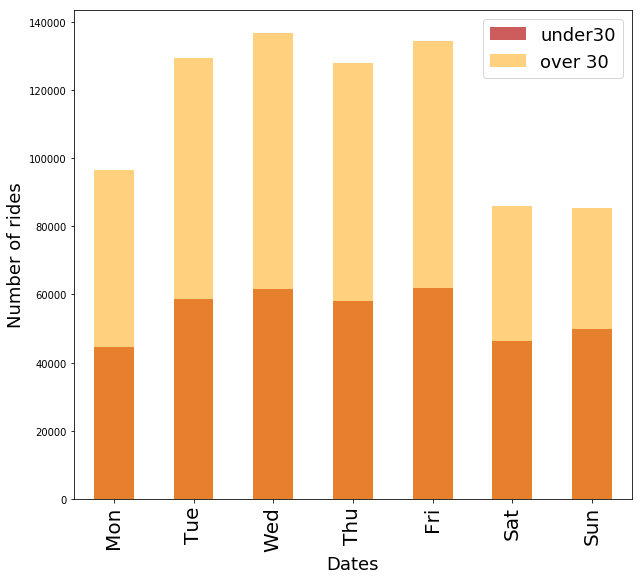

In [20]:
#plot the number of trips per week day
fig = pl.figure(figsize(10,9))


((data['date'][data['age'] <= 30].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='under30')

norm_pr = 1
ax = ((data['date'][data['age'] > 30].groupby([df['date'].dt.weekday]).count()) ).plot(kind="bar", 
                                                                                              color='Orange', 
                                                                                              alpha=0.5,
                                                                                              label='over 30')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.ylabel("Number of rides", fontsize = 18)
pl.xlabel("Dates", fontsize = 18)
pl.legend(fontsize = 18)

# Figure 1 Distribution of Citibike bikers by two age groups in July 2016 by absolute counts.

# for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic


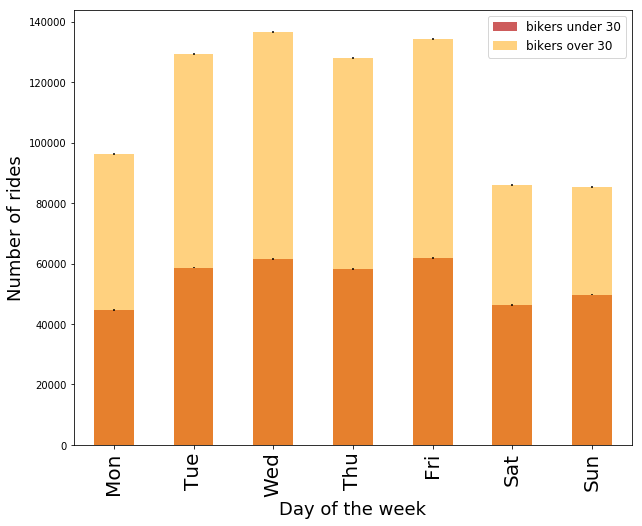

In [19]:
fig=pl.figure(figsize(10,8))

counts1 = data.date[data['age'] <= 30].groupby([data.date.dt.weekday]).count()
norm1=1
error1 = np.sqrt(counts1)
ax = ((counts1) / norm1).plot(kind="bar",color='IndianRed',  yerr=[((error1) / norm1, (error1) / norm1)], label='citibikers under 30')


counts2 = data.date[data['age'] >30 ].groupby([data.date.dt.weekday]).count()
norm2 = 1
error2=np.sqrt(counts2)
((counts2) / norm2).plot(kind="bar", alpha=0.5, yerr=[((error2) / norm2, (error2) / norm2)], 
                           color='Orange', label='citibikers over 30')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides", fontsize = 18)
ax.set_xlabel ("Day of the week", fontsize = 18)
pl.legend(['bikers under 30','bikers over 30'],fontsize=12)

# Figure 2 Distribution of Citibike bikers by two age groups(under30 and over30) in July 2016, absolute counts, with statistical errors

In [ ]:
#Proportions are more ameable to comparison, so let's normalize the distribution


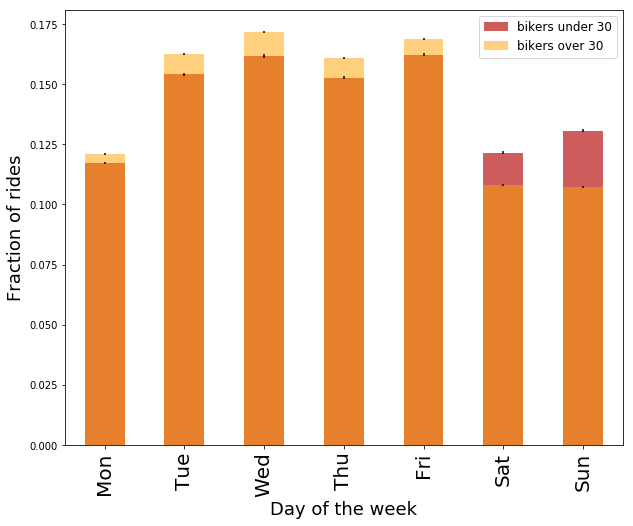

In [35]:
fig = pl.figure(figsize(10,8))
ax = fig.add_subplot()

norm1 = counts1.sum()
error1 = np.sqrt(counts1)
ax = ((counts1) / norm1).plot(kind="bar", color='IndianRed', 
                           yerr=[((error1) / norm1, (error1) / norm1)], 
                           label='bikers under 30')

norm2 = counts2.sum()
ax = ((counts2) / norm2).plot(kind="bar", alpha=0.5, 
                                yerr=[((error2) / norm2, (error2) / norm2)], 
                                color='Orange', label='bikers over 30')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", fontsize=18)
ax.set_xlabel ("Day of the week", fontsize=18)

pl.legend(['bikers under 30','bikers over 30'],fontsize=12)

# Figure 2: Distribution of Citibike bikers by two age groups (under 30 and over 30) in July 2016, normalized


In [41]:
week1 = sum(counts1[:-2]) * 1.0 / norm1 
weekend1 = sum(counts1[-2:]) * 1.0 / norm1  
#error bar
eweek1 = np.sqrt(sum(error1[:-2]**2)) / norm1  
eweekend1 = np.sqrt(sum(error1[-2:]**2)) / norm1


#same nomenclature as above
week2 = sum(counts2[:-2]) * 1.0 / norm2
weekend2 = sum(counts2[-2:]) * 1.0 / norm2
#error bar
eweek2 = np.sqrt(sum(error2[:-2]**2)) / norm2
eweekend2 = np.sqrt(sum(error2[-2:]**2)) / norm2

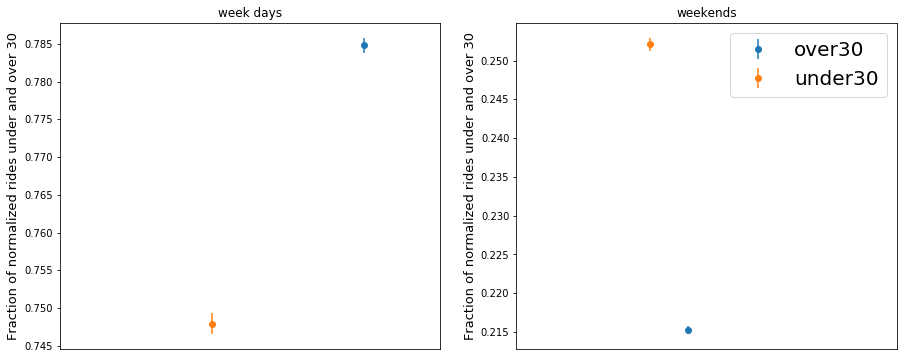

In [43]:
fig = pl.figure(figsize = (15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [week2], yerr=[eweek2], fmt='o', label='over30')
ax1.errorbar([0.2], [week1], yerr=[eweek1], fmt='o', label='under30')
ax1.set_xlim(0, 0.5)

ax2.errorbar([0.4], [weekend2], yerr=[eweekend2], fmt='o', label='over30')
ax2.errorbar([0.2], [weekend1], yerr=[eweekend1], fmt='o', label='under30')
ax1.set_xlim(0, 0.5)

ax1.set_title("week days")
ax2.set_title("weekends")

ax2.set_ylabel("Fraction of normalized rides under and over 30", fontsize = 13)
ax1.set_ylabel("Fraction of normalized rides under and over 30", fontsize = 13)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

# Figure 3: Fraction of Citibike bikers(under and over 30) in July 2016 for week days (left) and weekends (right)


# start z-test

** standard deviation of the sampling distribution the distribution is Binomial, the binomial stdev is **

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n0} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

** $\hat{p} =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$ **

** ${p0} =\frac{p<=30weekend}{p<=30total}$ **

** ${p1} =\frac{p>30weekend}{p>30total}$ **

In [44]:
def getp(p0, p1, n0, n1):
    p = (p0 * n0 + p1 * n1) / (n0 + n1)
    return p

def getse(p, n0, n1):
    se = np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
    return se

def getzscore(p0, p1, s):
    zscore = (p0 - p1) / s
    return zscore

# calculations
p = getp(weekend1, weekend2, norm1, norm2)
SE = getse(p, norm1, norm2)
z = getzscore(weekend1, weekend2, SE)

print ("The z statistics is %.10f"%z)

The z statistics is 44.7044825179


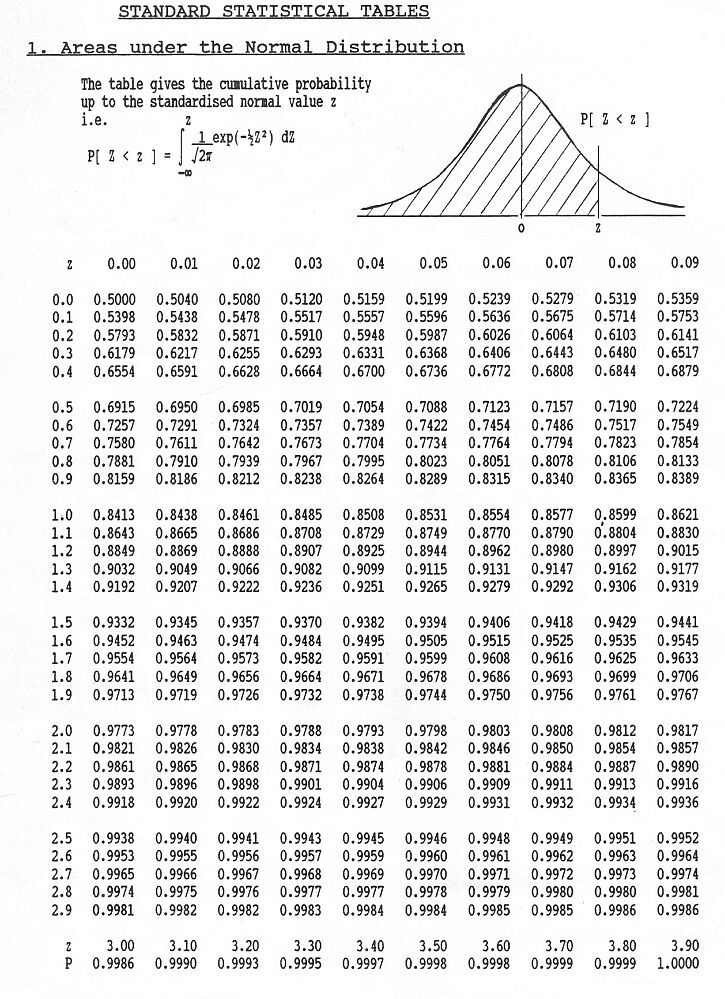

In [45]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

## The result of z-test is 44. The z-test table above shows that when the result is '3.9', the P is 1.000 ,pvalue is 0.00. So, the pvalue of my test is lower than α=0.05. I can reject the null hypothesis.


# So, the conclusion is that the proportion of people under 30 years old ride Citibikes on weekends is lower than the proportion of those over 30 on weekends in July, 2016.